<a href="https://colab.research.google.com/github/horaciobaptista/Machine-Learning/blob/main/teste_VITOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%%
"""
Created on Sat Jun 3 09:19:49 2023
@author: Vítor Peixoto
"""
#%% Import de packages para todos os exercícios
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')


In [3]:
#%% Exercício 6
df = pd.read_csv("mpg_dataset.csv")
df.dropna(inplace=True)
df.describe()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
#%% Exercício 7
ex7 = df.query("Origin == 'Europe' and Weight > 3500")
print(ex7)


      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
211  16.5          6         168.0       120.0  3820.0          16.7   
297  25.4          5         183.0        77.0  3530.0          20.1   

     Model Year  Origin  
211          76  Europe  
297          79  Europe  


<function matplotlib.pyplot.show(close=None, block=None)>

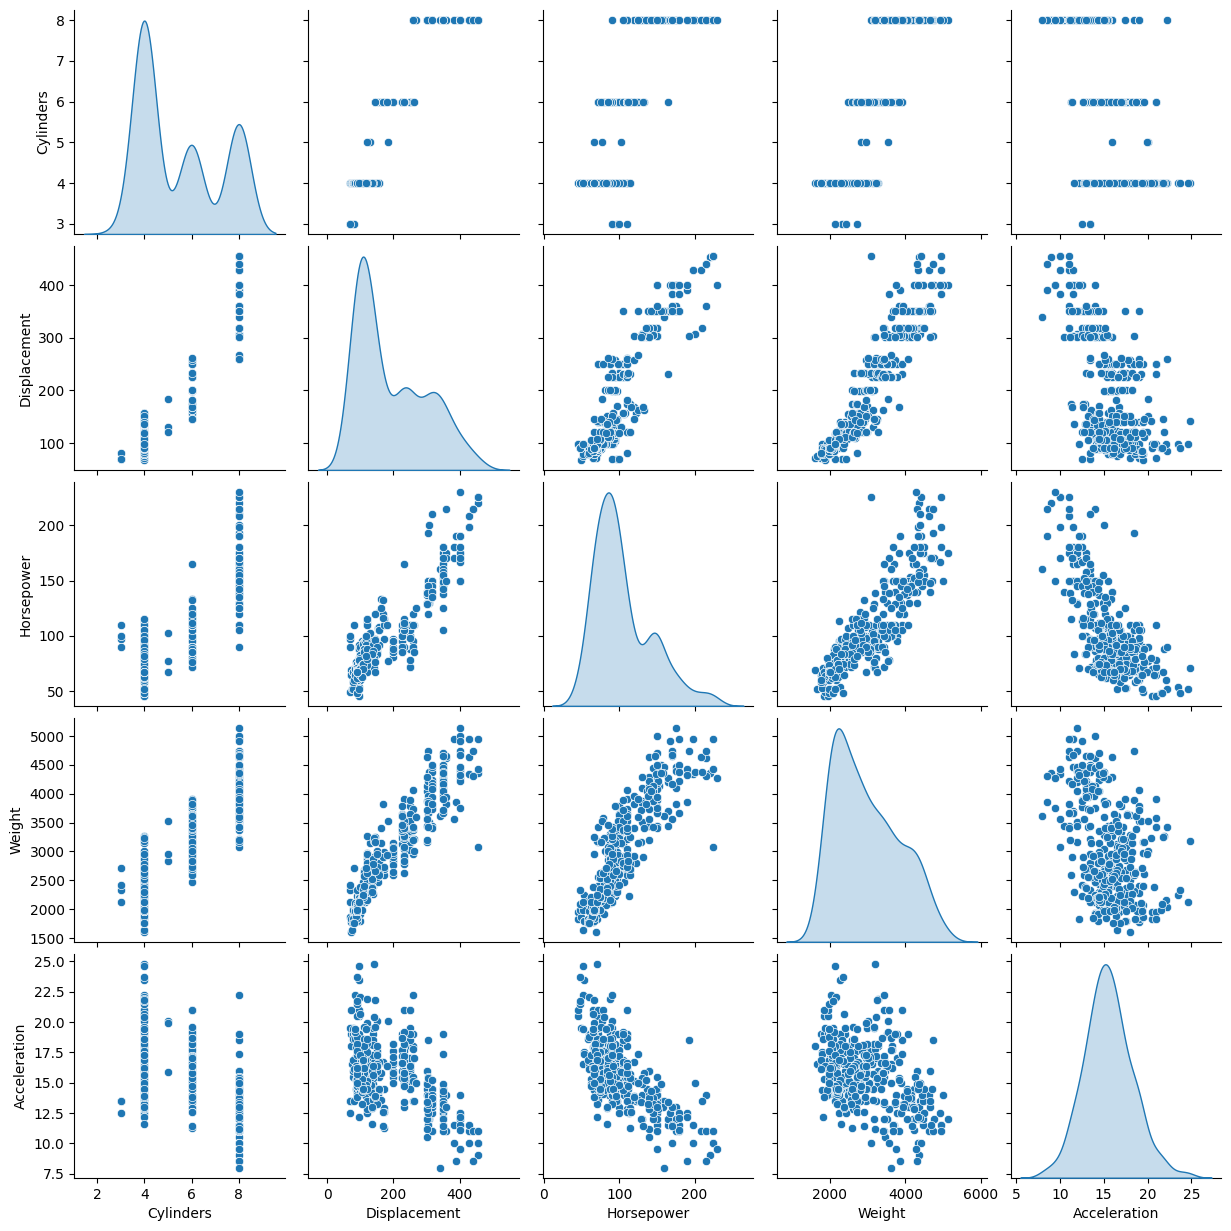

In [5]:
#%% Exercício 8
features = ['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration']
sns.pairplot(df[features], diag_kind="kde")
plt.show


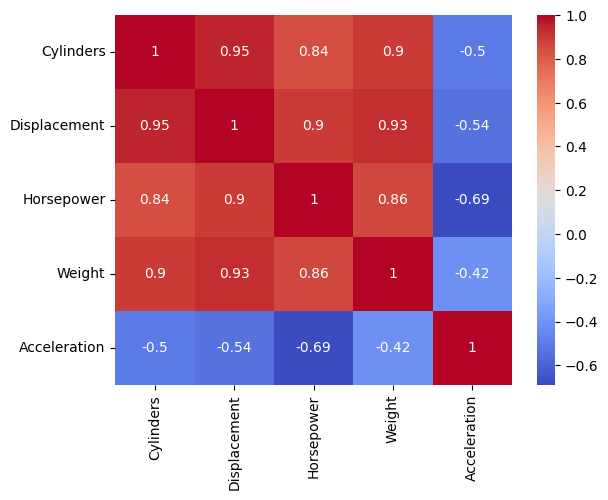

In [6]:
#%% Exercício 9
cor = df[features].corr()
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.show()


In [7]:
#%% Exercício 10
X = df[features]
y = df['MPG']
X.var()
LR = LinearRegression()
RFE = RFE(estimator=LR, n_features_to_select=3, step=1)
RFE.fit(X, y)
selected_features = X.columns[RFE.support_]
RFE.ranking_


array([1, 3, 1, 2, 1])

In [ ]:
#%% Exercício 11, 12
select = ['Cylinders', 'Horsepower', 'Acceleration']
df1 = df[select]
target =df['MPG']
x_train, x_test, y_train, y_test = train_test_split(df1,
target,test_size=0.3,
random_state=0)
rfr = RandomForestRegressor(random_state=0).fit(x_train, y_train)
y_pred = rfr.predict(df1)
round(rfr.score(x_test, y_test), 4)
for col, val in sorted(zip(x_train.columns, rfr.feature_importances_),
key=lambda x: x[1], reverse=True)[:11]:
  print(f"{col:10}{val:10.3f}")
mae = metrics.mean_absolute_error(target, y_pred)
r2 = r2_score(target, y_pred)
rmse = metrics.mean_squared_error(target, y_pred)
print("R-squared (R2):", r2)
print("MAE:", mae)
print("RMSE:", rmse)
fin = ['Cylinders', 'Horsepower', 'Acceleration', 'MPG']
dfsel = df[fin]
dfsel['pred'] = y_pred
dfsel['dif'] = dfsel['MPG'] - dfsel['pred']
dfsel['dif'].plot.hist(stacked=False)
plt.show()